In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import time

data = pd.read_csv('../DATASET/Hasil_Gabungan.csv')

C:\Users\Jeff\AppData\Local\Temp\ipykernel_11348\2277498483.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


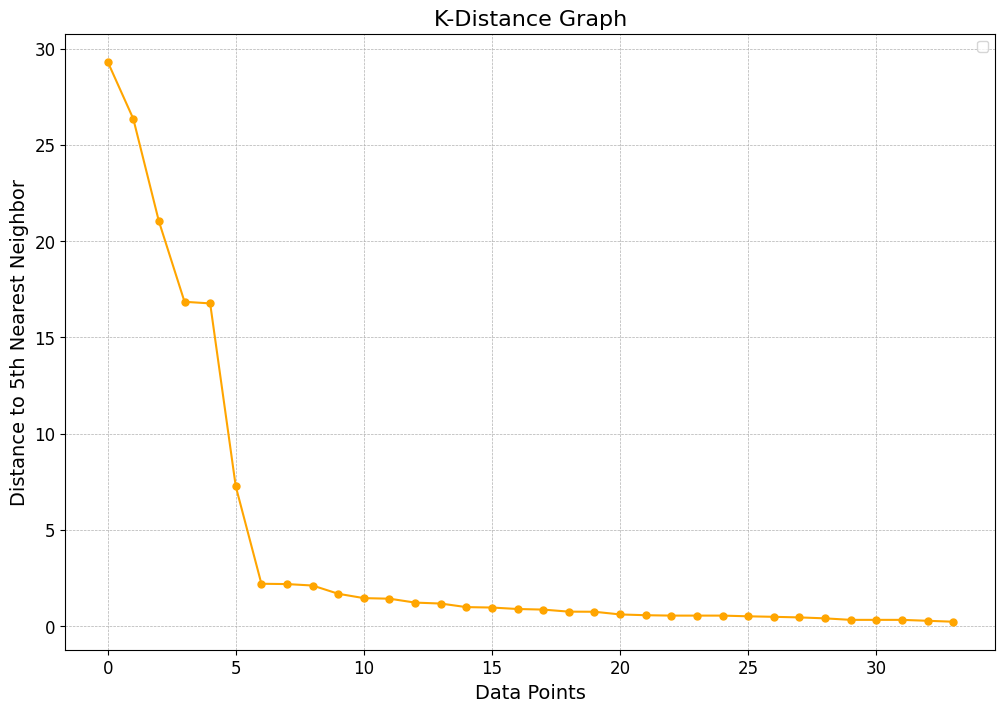


Provinsi yang masuk dalam Cluster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Maluku', 'Maluku Utara', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']

Provinsi yang masuk dalam Cluster -1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']


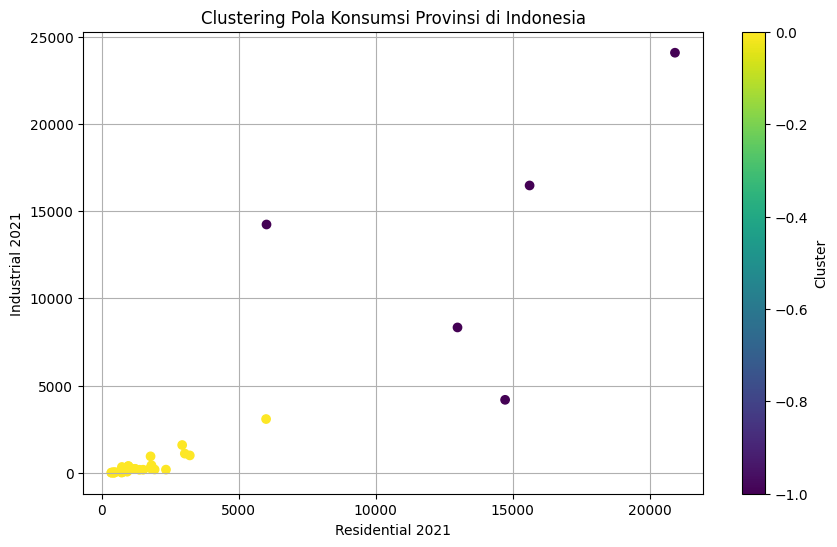


Jumlah cluster yang ditemukan: 1
Jumlah outlier: 5


In [165]:
features = ['Residential_2021', 'Business_2021', 'Industrial_2021', 'Social_2021', 'Gov_Office_2021', 'Pub_Street_2021', 'Total_2021', 'JP_2021', 'KP_2021']

data_T2021 = data[features]
scaler = RobustScaler()
scaled_features = scaler.fit_transform(data_T2021)

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

distances = sorted(distances[:,4], reverse=True)

plt.figure(figsize=(12, 8))
plt.plot(distances, color='orange', linestyle='-', marker='o', markersize=5)
plt.title("K-Distance Graph", fontsize=16)
plt.xlabel("Data Points", fontsize=14)
plt.ylabel("Distance to 5th Nearest Neighbor", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()

plt.show()

dbscan = DBSCAN(eps=6, min_samples=16)
clusters = dbscan.fit_predict(scaled_features)
data['Cluster'] = clusters

provinsi_cluster = data[['Province', 'Cluster']]

for cluster in set(clusters):
    print(f"\nProvinsi yang masuk dalam Cluster {cluster}:")
    print(provinsi_cluster[provinsi_cluster['Cluster'] == cluster]['Province'].to_list())

plt.figure(figsize=(10, 6))
plt.scatter(data['Residential_2021'], data['Industrial_2021'], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering Pola Konsumsi Provinsi di Indonesia')
plt.xlabel('Residential 2021')
plt.ylabel('Industrial 2021')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  
num_outliers = list(clusters).count(-1)  

print(f"\nJumlah cluster yang ditemukan: {num_clusters}")
print(f"Jumlah outlier: {num_outliers}")

C:\Users\Jeff\AppData\Local\Temp\ipykernel_11348\1153783748.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


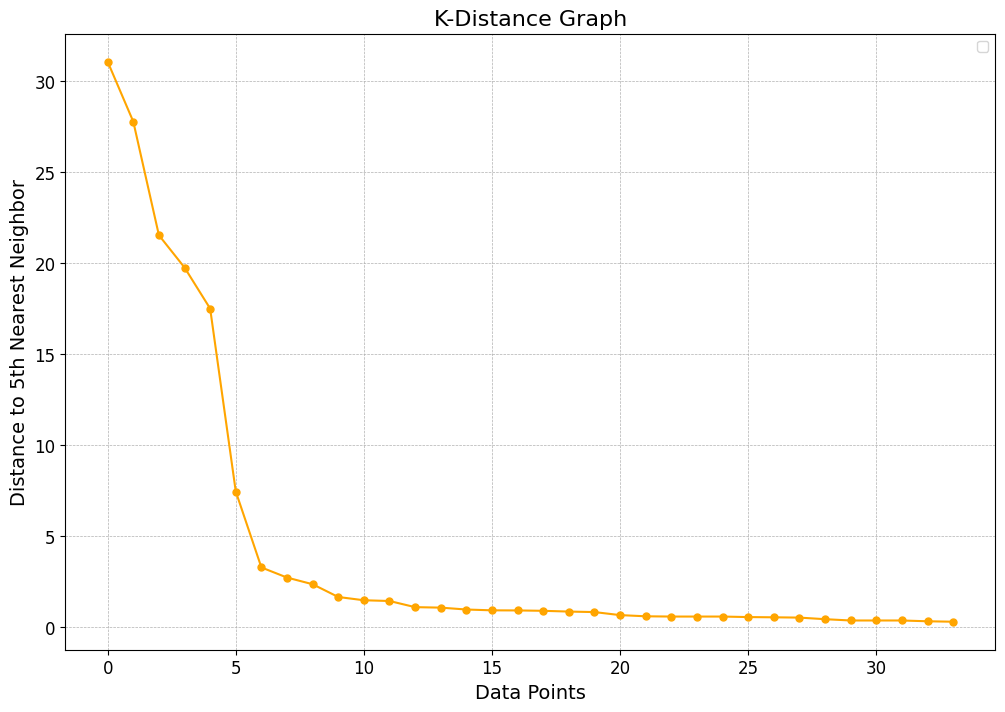


Provinsi yang masuk dalam Cluster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Maluku', 'Maluku Utara', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']

Provinsi yang masuk dalam Cluster -1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']


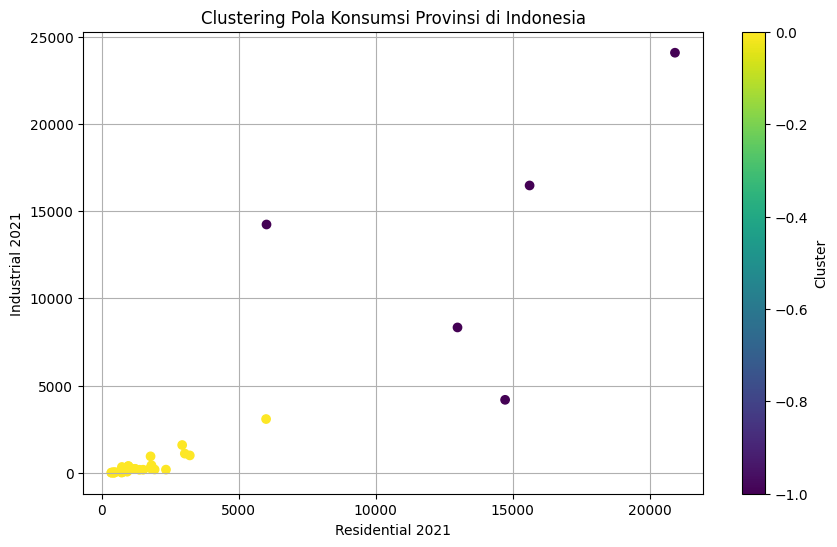


Jumlah cluster yang ditemukan: 1
Jumlah outlier: 5


In [166]:
features = ['Residential_2022', 'Business_2022', 'Industrial_2022', 'Social_2022', 'Gov_Office_2022', 'Pub_Street_2022', 'Total_2022', 'JP_2022', 'KP_2022']

data_T2022 = data[features]

robust_scaler2 = RobustScaler()
data_scaled_2022 = robust_scaler2.fit_transform(data_T2022)

neighbors2 = NearestNeighbors(n_neighbors=5)
neighbors_fit2 = neighbors2.fit(data_scaled_2022)
distances2, indices = neighbors_fit2.kneighbors(data_scaled_2022)

distances2 = sorted(distances2[:,4], reverse=True)

plt.figure(figsize=(12, 8))
plt.plot(distances2, color='orange', linestyle='-', marker='o', markersize=5)
plt.title("K-Distance Graph", fontsize=16)
plt.xlabel("Data Points", fontsize=14)
plt.ylabel("Distance to 5th Nearest Neighbor", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()

plt.show()

dbscan2 = DBSCAN(eps=6, min_samples=16)
clusters2 = dbscan2.fit_predict(data_scaled_2022)
data['Cluster'] = clusters2

provinsi_cluster2 = data[['Province', 'Cluster']]

for cluster in set(clusters2):
    print(f"\nProvinsi yang masuk dalam Cluster {cluster}:")
    print(provinsi_cluster2[provinsi_cluster2['Cluster'] == cluster]['Province'].to_list())

plt.figure(figsize=(10, 6))
plt.scatter(data['Residential_2021'], data['Industrial_2021'], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering Pola Konsumsi Provinsi di Indonesia')
plt.xlabel('Residential 2021')
plt.ylabel('Industrial 2021')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  
num_outliers = list(clusters).count(-1)  

print(f"\nJumlah cluster yang ditemukan: {num_clusters}")
print(f"Jumlah outlier: {num_outliers}")

C:\Users\Jeff\AppData\Local\Temp\ipykernel_11348\1214931368.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


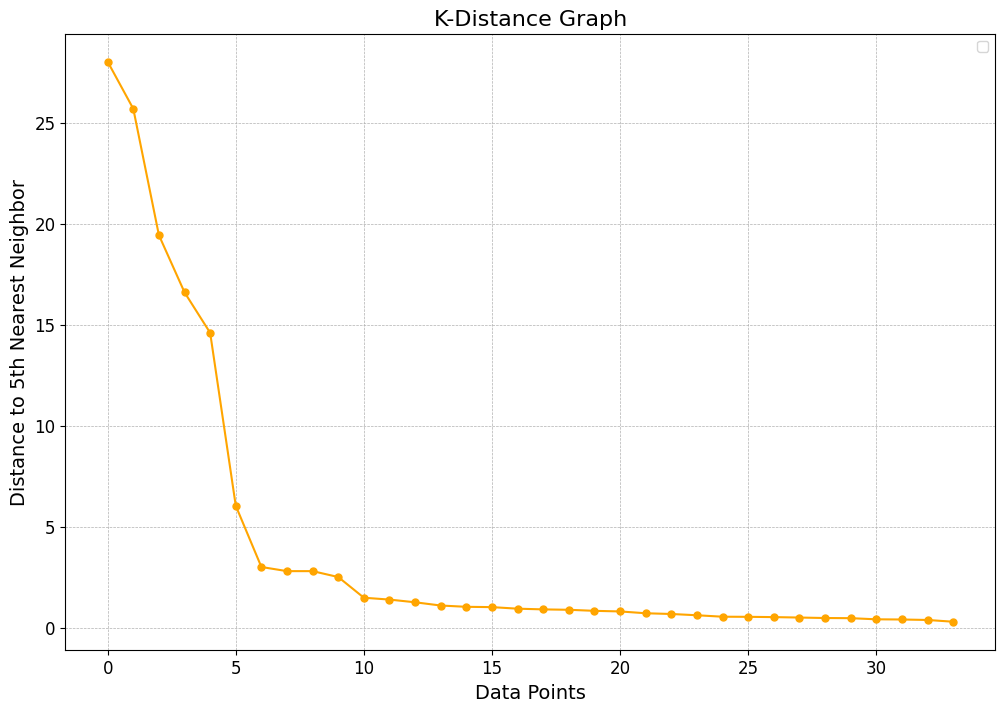

Waktu eksekusi DBSCAN: 6.151199340820312e-05 detik

Provinsi yang masuk dalam Cluster 0:
['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Kep. Riau', 'Sumatera Selatan', 'Jambi', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Sulawesi Utara', 'Sulawesi Utara', 'Gorontalo', 'Sulawesi Tengah', 'Sulawesi Tenggara', 'Maluku', 'Maluku Utara', 'Maluku Utara', 'Papua', 'Papua Barat', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'DI Yogyakarta', 'Kalimantan Timur', 'Kalimantan Utara']

Provinsi yang masuk dalam Cluster -1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']


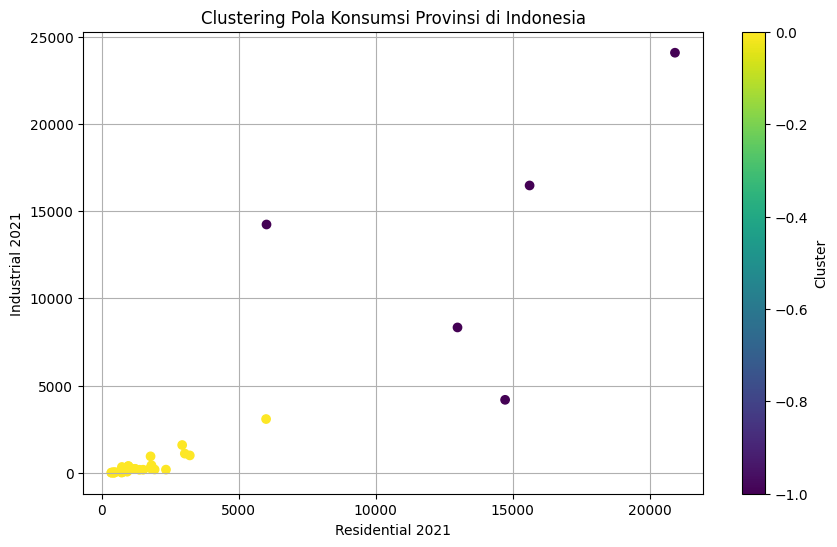


Jumlah cluster yang ditemukan: 1
Jumlah outlier: 5


In [167]:
features = ['Residential', 'Business', 'Industrial', 'Social', 'Gov_Office', 'Pub_Street', 'Total', 'JP_2023', 'KP_2023']

data_T2023 = data_final[features]

robust_scaler3 = RobustScaler()
data_scaled_2023 = robust_scaler3.fit_transform(data_T2023)

neighbors3 = NearestNeighbors(n_neighbors=5)
neighbors_fit3 = neighbors3.fit(data_scaled_2023)
distances3, indices = neighbors_fit3.kneighbors(data_scaled_2023)

distances3 = sorted(distances3[:,4], reverse=True)

plt.figure(figsize=(12, 8))
plt.plot(distances3, color='orange', linestyle='-', marker='o', markersize=5)
plt.title("K-Distance Graph", fontsize=16)
plt.xlabel("Data Points", fontsize=14)
plt.ylabel("Distance to 5th Nearest Neighbor", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()

plt.show()
start_time = time.time()
dbscan3 = DBSCAN(eps=6, min_samples=16)
print(f"Waktu eksekusi DBSCAN: {time.time() - start_time} detik")
clusters3 = dbscan3.fit_predict(data_scaled_2023)
data['Cluster'] = clusters3

provinsi_cluster3 = data[['Province', 'Cluster']]

for cluster in set(clusters3):
    print(f"\nProvinsi yang masuk dalam Cluster {cluster}:")
    print(provinsi_cluster3[provinsi_cluster3['Cluster'] == cluster]['Province'].to_list())

plt.figure(figsize=(10, 6))
plt.scatter(data['Residential_2021'], data['Industrial_2021'], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering Pola Konsumsi Provinsi di Indonesia')
plt.xlabel('Residential 2021')
plt.ylabel('Industrial 2021')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  
num_outliers = list(clusters).count(-1)  

print(f"\nJumlah cluster yang ditemukan: {num_clusters}")
print(f"Jumlah outlier: {num_outliers}")

In [168]:
from sklearn.metrics import silhouette_score

sil_score_2021 = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score untuk Tahun 2021: {sil_score_2021}")

sil_score_2022 = silhouette_score(data_scaled_2022, clusters2)
print(f"Silhouette Score untuk Tahun 2022: {sil_score_2022}")

sil_score_2023 = silhouette_score(data_scaled_2023, clusters3)
print(f"Silhouette Score untuk Tahun 2032: {sil_score_2023}")

Silhouette Score untuk Tahun 2021: 0.8182831197172582
Silhouette Score untuk Tahun 2022: 0.8186232922822265
Silhouette Score untuk Tahun 2032: 0.8054574748126749


In [169]:
from sklearn.metrics import davies_bouldin_score
dbi_dbscan2021 = davies_bouldin_score(scaled_features, clusters)
print(f"DBI untuk DBSCAN: {dbi_dbscan2021}")

dbi_dbscan2022 = davies_bouldin_score(data_scaled_2022, clusters2)
print(f"DBI untuk DBSCAN: {dbi_dbscan2022}")

dbi_dbscan2023 = davies_bouldin_score(data_scaled_2023, clusters3)
print(f"DBI untuk DBSCAN: {dbi_dbscan2023}")

DBI untuk DBSCAN: 0.5507659950575499
DBI untuk DBSCAN: 0.5563485104154854
DBI untuk DBSCAN: 0.5818627807531498


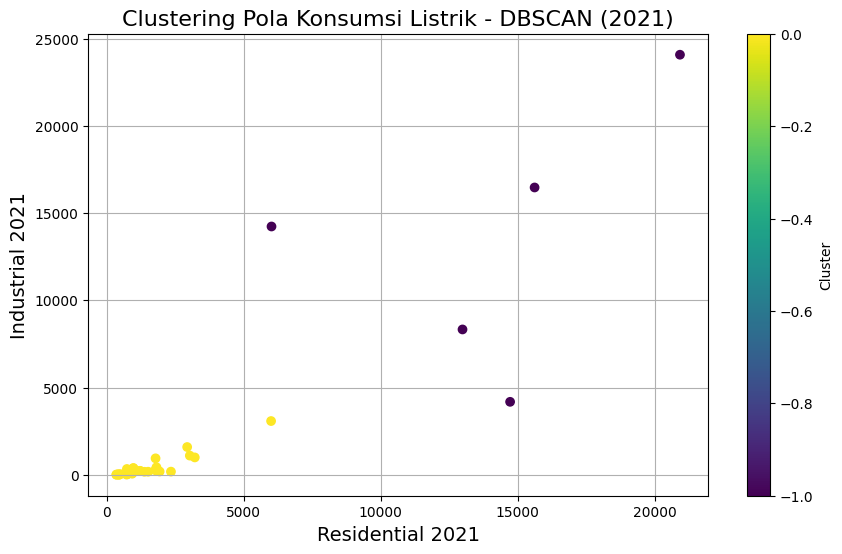

In [170]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Residential_2021'], data['Industrial_2021'], c=clusters, cmap='viridis', marker='o')
plt.title('Clustering Pola Konsumsi Listrik - DBSCAN (2021)', fontsize=16)
plt.xlabel('Residential 2021', fontsize=14)
plt.ylabel('Industrial 2021', fontsize=14)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

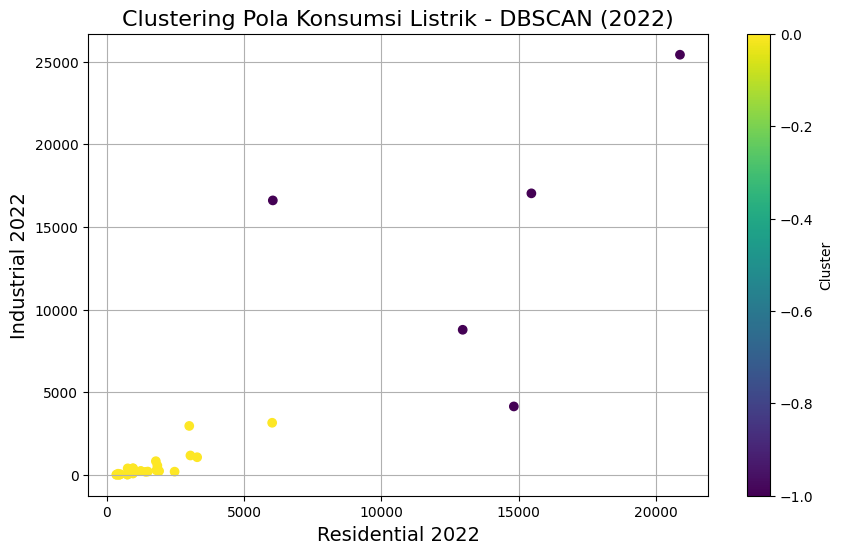

In [171]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Residential_2022'], data['Industrial_2022'], c=clusters2, cmap='viridis', marker='o')
plt.title('Clustering Pola Konsumsi Listrik - DBSCAN (2022)', fontsize=16)
plt.xlabel('Residential 2022', fontsize=14)
plt.ylabel('Industrial 2022', fontsize=14)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

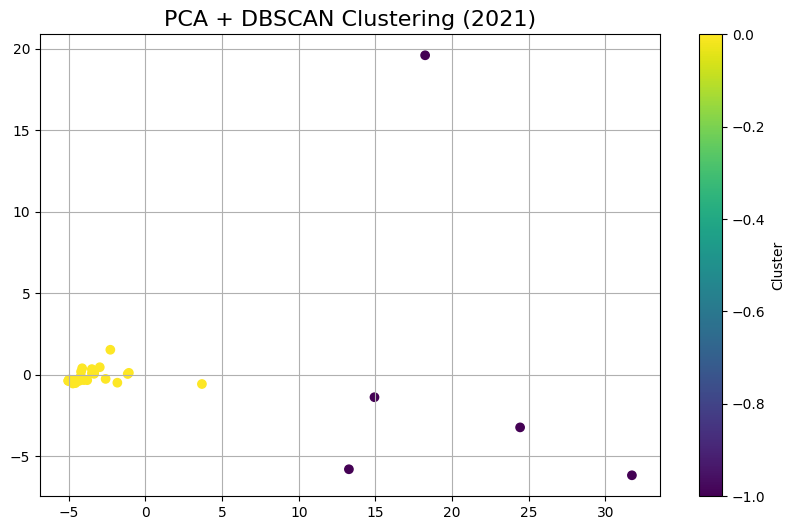

In [172]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('PCA + DBSCAN Clustering (2021)', fontsize=16)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()